In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


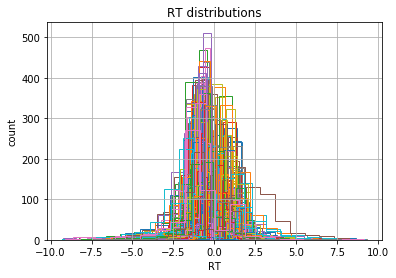

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (surprised) and facial expression (surprised)
rr1_data = data1.loc[(data1['emotionRating'] == 'surprised') & (data1['expression'] == 'surprised')]
rr1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
556,gc2le9xecjp1stz,5,6,surprised,562,_faces/71_M_R_X.jpg,71_M_R_X,71,M,surprised,baseline,1,1.369480,0,0,0,0,0,100
561,gc2le9xecjp1stz,5,6,surprised,567,_faces/14_F_R_L.jpg,14_F_R_L,14,F,surprised,lower,1,0.956305,0,0,0,0,0,50
562,gc2le9xecjp1stz,5,6,surprised,568,_faces/61_F_R_U.jpg,61_F_R_U,61,F,surprised,upper,0,-1.049810,0,0,0,0,0,50
567,gc2le9xecjp1stz,5,6,surprised,573,_faces/20_M_R_L.jpg,20_M_R_L,20,M,surprised,lower,0,-0.762875,0,0,0,0,0,50
568,gc2le9xecjp1stz,5,6,surprised,574,_faces/33_M_R_U.jpg,33_M_R_U,33,M,surprised,upper,1,0.298050,0,0,0,0,0,50
577,gc2le9xecjp1stz,5,6,surprised,587,_faces/14_F_R_X.jpg,14_F_R_X,14,F,surprised,baseline,0,-0.669860,0,0,0,0,0,100
582,gc2le9xecjp1stz,5,6,surprised,601,_faces/33_M_R_L.jpg,33_M_R_L,33,M,surprised,lower,1,0.172880,0,0,0,0,0,50
589,gc2le9xecjp1stz,5,6,surprised,616,_faces/71_M_R_L.jpg,71_M_R_L,71,M,surprised,lower,0,-0.567105,0,0,0,0,0,50
599,gc2le9xecjp1stz,5,6,surprised,631,_faces/31_F_R_L.jpg,31_F_R_L,31,F,surprised,lower,1,0.576700,0,0,0,0,0,50
602,gc2le9xecjp1stz,5,6,surprised,635,_faces/61_F_R_X.jpg,61_F_R_X,61,F,surprised,baseline,0,-0.336825,0,0,0,0,0,100


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rr1_data = rr1_data[(rr1_data.subj_idx != '7chb1ucy8l7g29z')]

In [6]:
# define model
m_rr1 = hddm.HDDMRegressor(rr1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 40050.9 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean         std        2.5q         25q         50q        75q      97.5q       mc err
a                                    1.65159    0.036815     1.57959     1.62653     1.65111    1.67662     1.7241  0.000873579
a_std                               0.496523   0.0315603    0.437016    0.474889    0.495104   0.517396   0.562156  0.000884521
a_subj.02hcv424u29nd5w               2.17932    0.315709     1.66953     1.95388     2.14212      2.364    2.90629   0.00905283
a_subj.02k2uwlhgxnumn9               1.42326     0.23933     1.02754     1.25565     1.39603    1.56587    1.96033   0.00752443
a_subj.03g7h2hzq4o3g26               2.77994    0.327123     2.21559     2.54608     2.75103    2.98587    3.50179   0.00717855
a_subj.0nmr75cysk1ae0e               1.98507    0.225366     1.59779     1.82197     1.97109     2.1291    2.46491   0.00502653
a_subj.0t8qp67pqkw36cb               1.93113    0.365206     1.32791     1.66529      1.8867    2.16505 

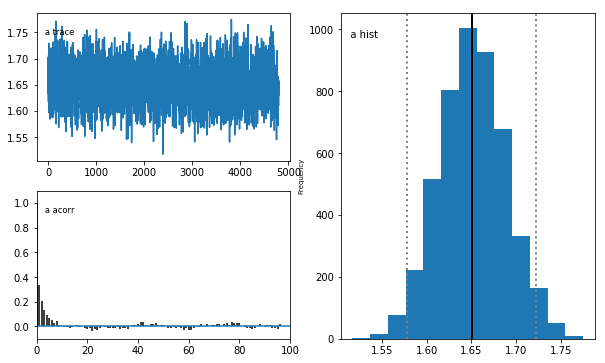

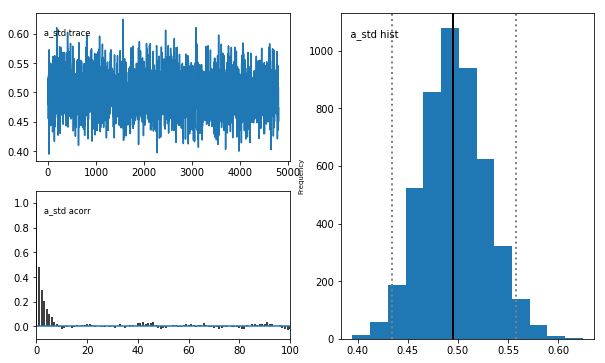

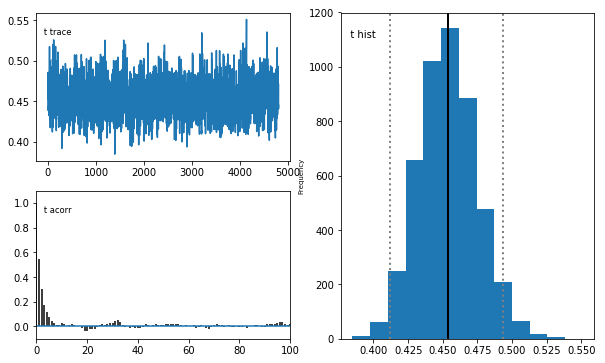

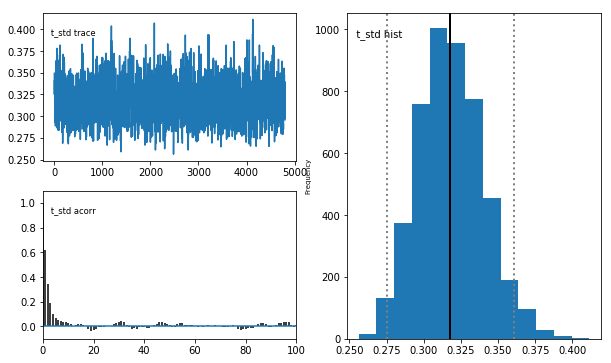

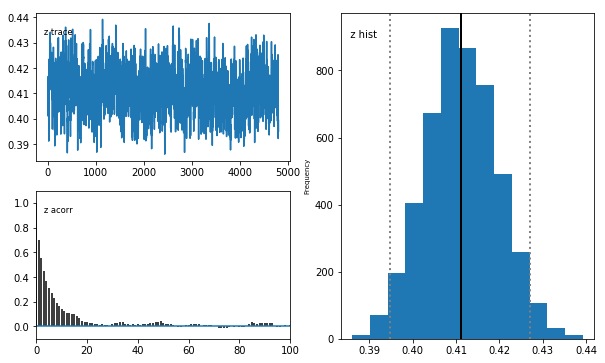

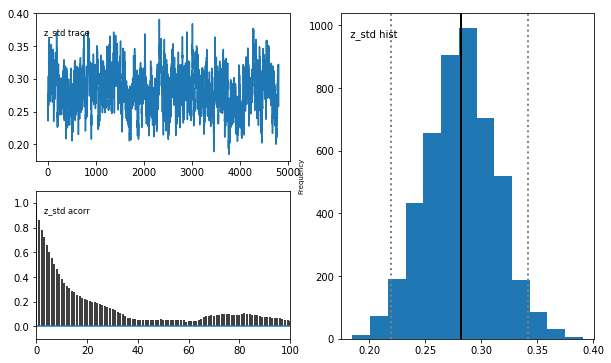

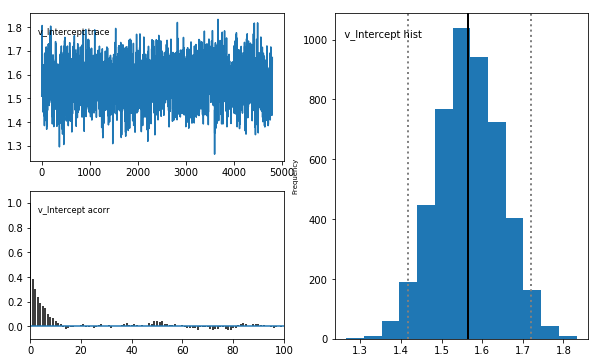

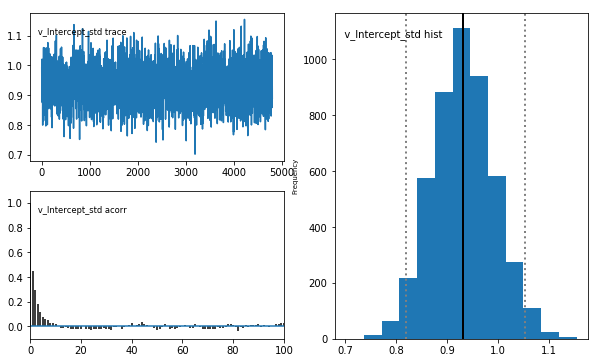

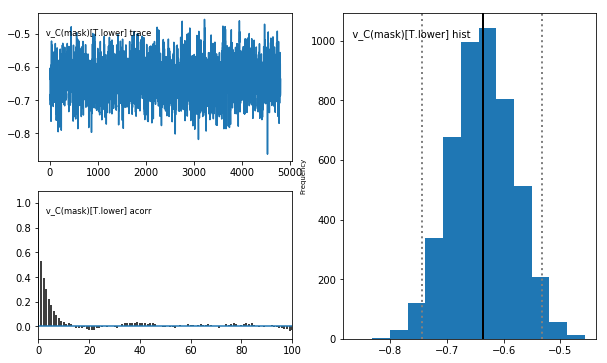

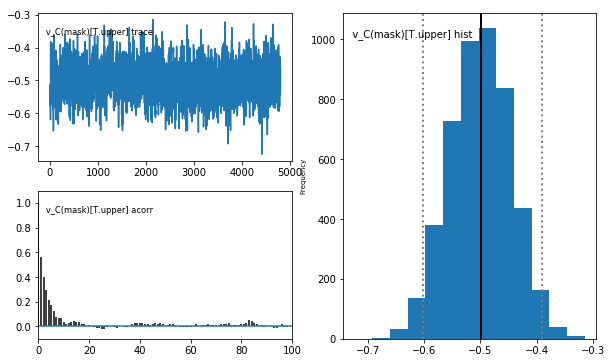

In [7]:
# run model
m_rr1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rr1.print_stats()
m_rr1.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean        std      2.5q         25q  \
a                                    1.65159   0.036815   1.57959     1.62653   
a_std                               0.496523  0.0315603  0.437016    0.474889   
a_subj.02hcv424u29nd5w               2.17932   0.315709   1.66953     1.95388   
a_subj.02k2uwlhgxnumn9               1.42326    0.23933   1.02754     1.25565   
a_subj.03g7h2hzq4o3g26               2.77994   0.327123   2.21559     2.54608   
a_subj.0nmr75cysk1ae0e               1.98507   0.225366   1.59779     1.82197   
a_subj.0t8qp67pqkw36cb               1.93113   0.365206   1.32791     1.66529   
a_subj.0vfpn4uf3t031qu               1.17887   0.143379  0.941383     1.07824   
a_subj.11dsfdtym1yy5mx               2.15037   0.263032   1.70145     1.96138   
a_subj.1d3dadyu4ekqb4q               1.49821   0.196901   1.16412     1.35768   
a_subj.1mt2emp4645cbl1               1.68333   0.204502   1.33315     1.53966   
a_subj.1rst24mbtgy9rc8      

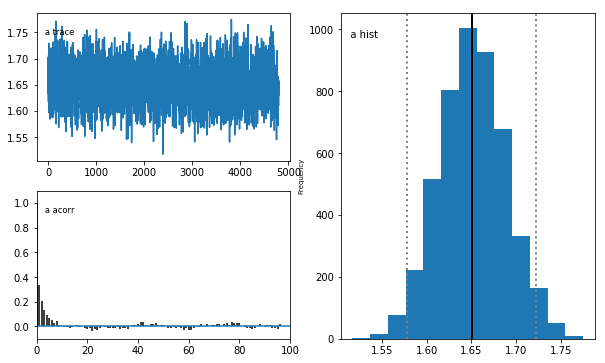

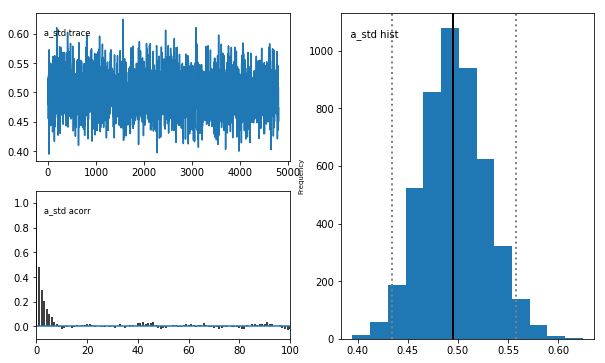

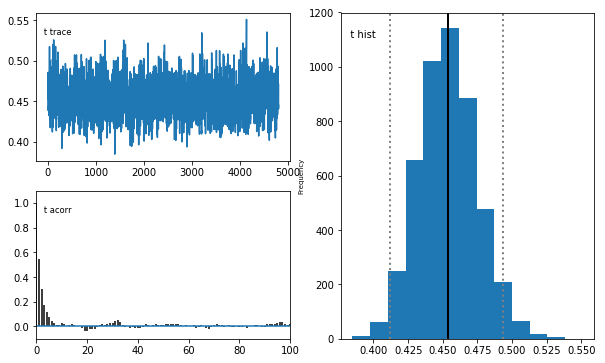

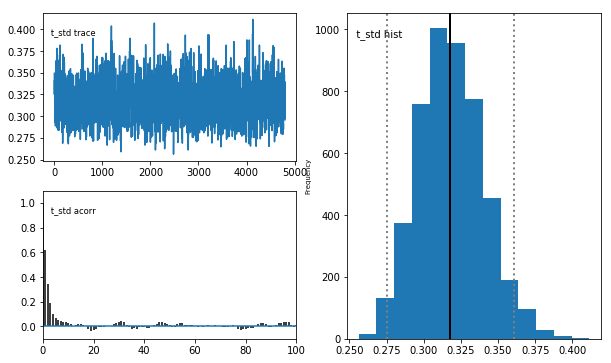

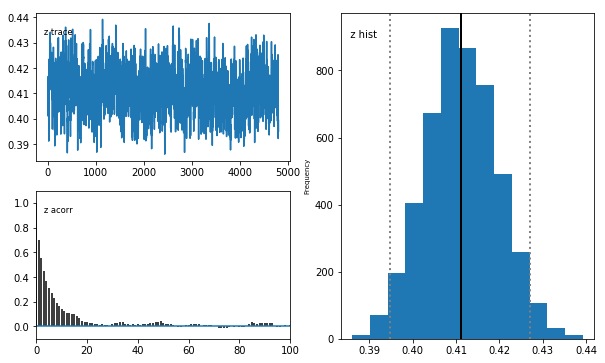

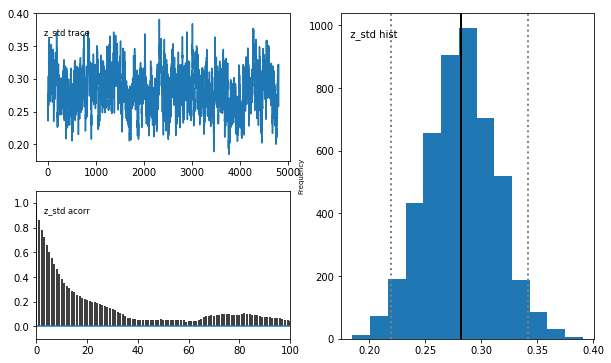

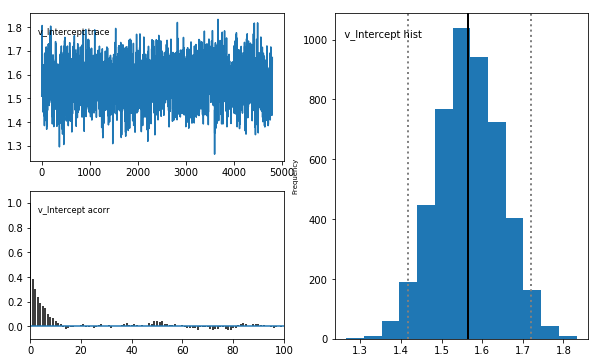

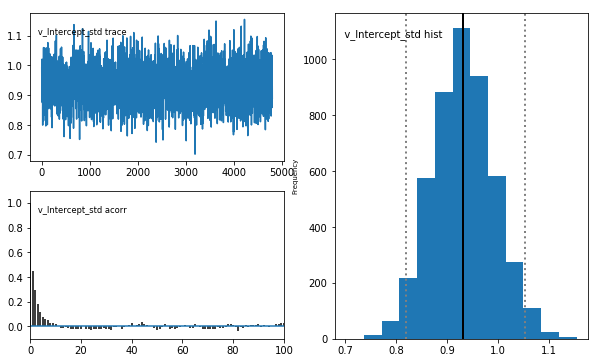

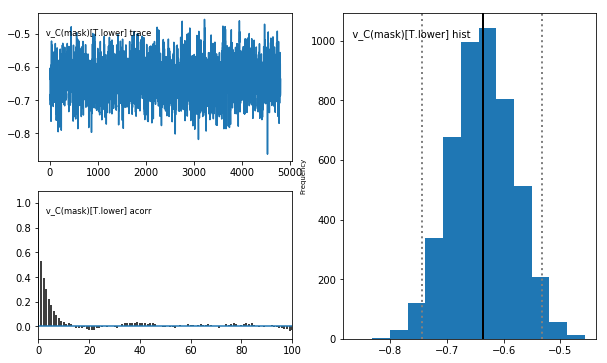

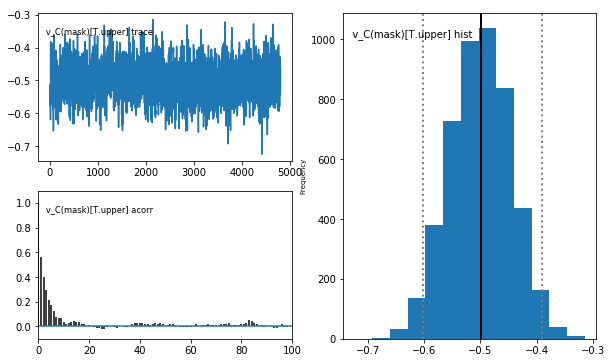

In [8]:
# save model stats
rr1_stats = m_rr1.gen_stats()
print(rr1_stats)
rr1_stats.to_csv('rr1_5000/faceMask_hddm_drift_maskFalseNegatives_rr1_5000.csv', index=True)

# save model posterior plots
m_rr1.plot_posteriors(path='rr1_5000/_posteriors', save=True)

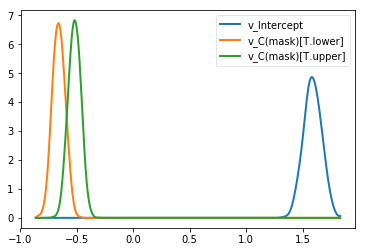

In [9]:
# plot model posteriors by mask
rr1_v_none, rr1_v_lower, rr1_v_upper = m_rr1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rr1_v_none, rr1_v_lower, rr1_v_upper])
plt.savefig('rr1_5000/faceMask_hddm_drift_maskFalsePositives_rr1_5000_v_mask.pdf')

In [11]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rr1_v_none < 0) = ", (rr1_v_none.trace() < 0).mean())
print("P(rr1_v_lower > 0) = ", (rr1_v_lower.trace() > 0).mean())
print("P(rr1_v_upper > 0) = ", (rr1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rr1_v_lower > rr1_v_upper) = ", (rr1_v_lower.trace() > rr1_v_upper.trace()).mean())

P(rr1_v_none < 0) =  0.0
P(rr1_v_lower > 0) =  0.0
P(rr1_v_upper > 0) =  0.0
P(rr1_v_lower > rr1_v_upper) =  0.00583333333333


In [12]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


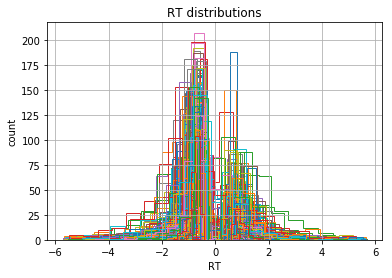

In [13]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [14]:
# subset dataset by emotion rating type (surprised) and facial expression (surprised)
rr2_data = data2.loc[(data2['emotionRating'] == 'surprised') & (data2['expression'] == 'surprised')]
rr2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
13,lbmmswtrr0mpvov,0,3,surprised,13,_faces/AM04_R_L.jpg,AM04_R_L,AM04,A,M,surprised,lower,0,-1.250875,0,0,0,0,0,50
18,lbmmswtrr0mpvov,0,3,surprised,18,_faces/WF02_R_X.jpg,WF02_R_X,WF02,W,F,surprised,baseline,1,0.676070,0,0,0,0,0,100
31,lbmmswtrr0mpvov,0,3,surprised,31,_faces/AM04_R_X.jpg,AM04_R_X,AM04,A,M,surprised,baseline,1,1.268375,0,0,0,0,0,100
36,lbmmswtrr0mpvov,0,3,surprised,36,_faces/WF02_R_U.jpg,WF02_R_U,WF02,W,F,surprised,upper,1,0.908140,0,0,0,0,0,50
44,lbmmswtrr0mpvov,0,3,surprised,44,_faces/WF02_R_L.jpg,WF02_R_L,WF02,W,F,surprised,lower,1,0.850425,0,0,0,0,0,50
45,lbmmswtrr0mpvov,0,3,surprised,45,_faces/AM04_R_U.jpg,AM04_R_U,AM04,A,M,surprised,upper,1,0.876780,0,0,0,0,0,50
51,lbmmswtrr0mpvov,0,3,surprised,51,_faces/BM17_R_U.jpg,BM17_R_U,BM17,B,M,surprised,upper,0,-0.725275,0,0,0,0,0,50
589,mr81dhy9r5lxu8r,5,2,surprised,270,_faces/AM07_R_U.jpg,AM07_R_U,AM07,A,M,surprised,upper,1,1.807000,0,0,0,0,0,50


In [15]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rr2_data = rr2_data[(rr2_data.subj_idx != 'xs5439nm2v85thb') & (rr2_data.subj_idx != 'me8doxrmo9vj9dx') & (rr2_data.subj_idx != 'dqph4ch0mkofejw')]

In [16]:
# define model
m_rr2 = hddm.HDDMRegressor(rr2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 52684.6 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean         std        2.5q        25q         50q        75q     97.5q       mc err
a                                    1.54586   0.0342766     1.47931    1.52338     1.54423    1.56752   1.61666   0.00126996
a_std                               0.396962   0.0321082    0.337416   0.375489    0.395556   0.417562  0.463976   0.00144389
a_subj.09coqg8hlpux6fe               1.12379    0.201241    0.791239   0.979473     1.10289    1.24289   1.57009   0.00506809
a_subj.0b3t2skj9mlhbkn               1.35522    0.210081     1.00163    1.20355     1.33204    1.48765    1.8273   0.00451665
a_subj.0bcg7mtj2n1jjw9               2.52402    0.387898     1.85258    2.24299     2.50179    2.77541   3.34262    0.0100774
a_subj.0s53r30oouek89b               1.87528    0.295007     1.37266    1.66532     1.85136    2.05514   2.51566   0.00731445
a_subj.0uj9gbhag3o1w1v               1.30655    0.266012    0.868224    1.11465     1.28039    1.46151   1.90327   0.0

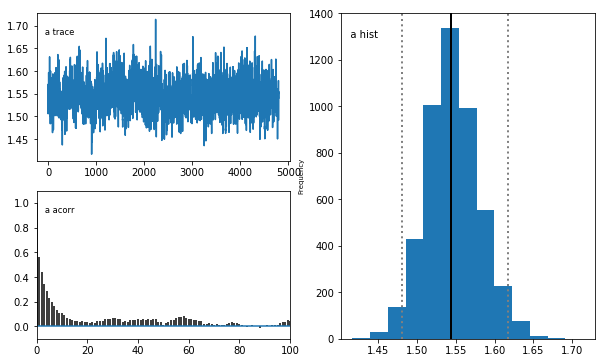

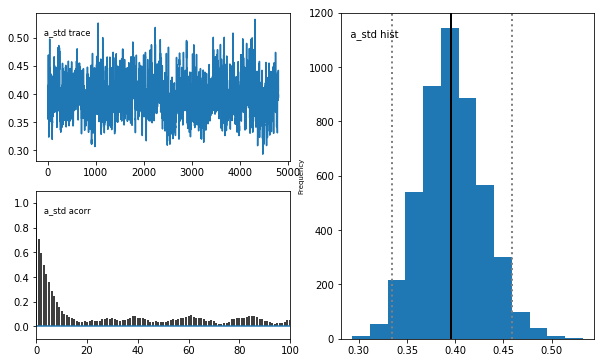

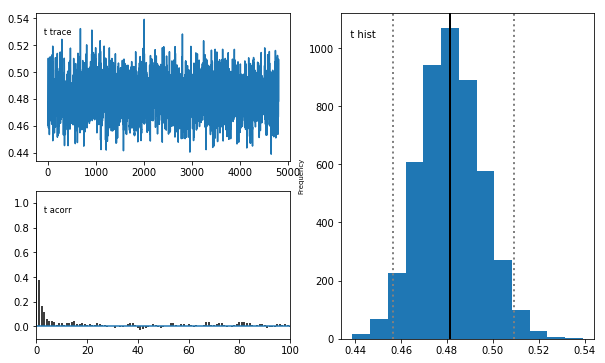

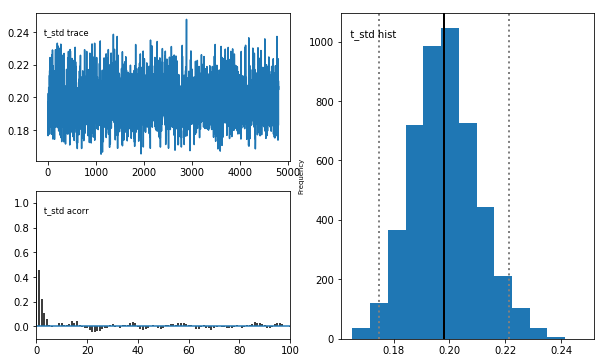

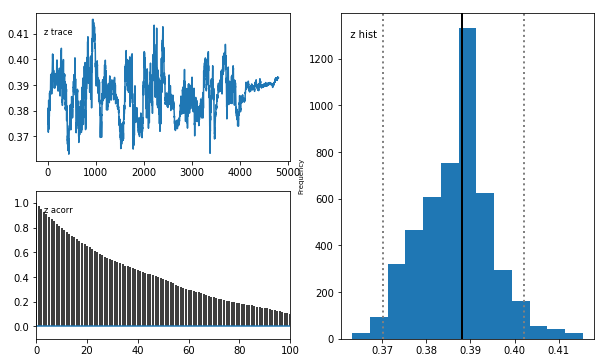

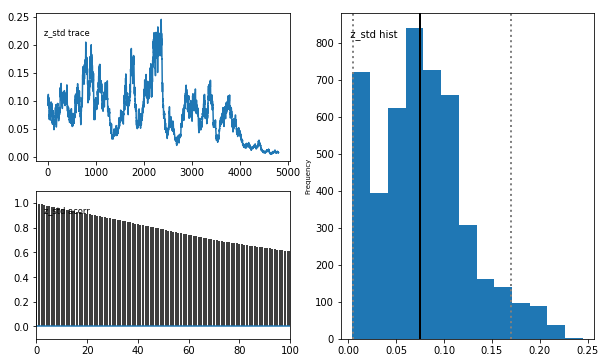

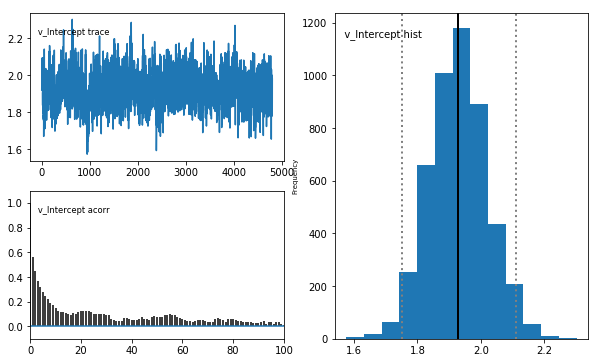

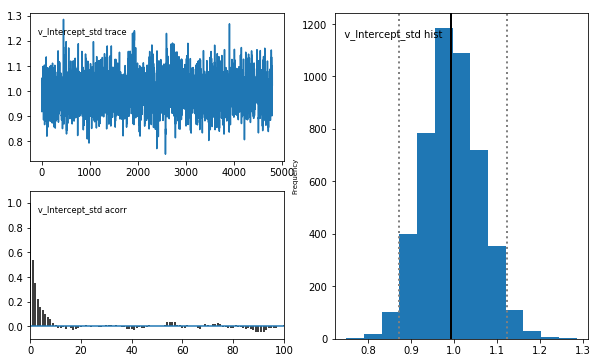

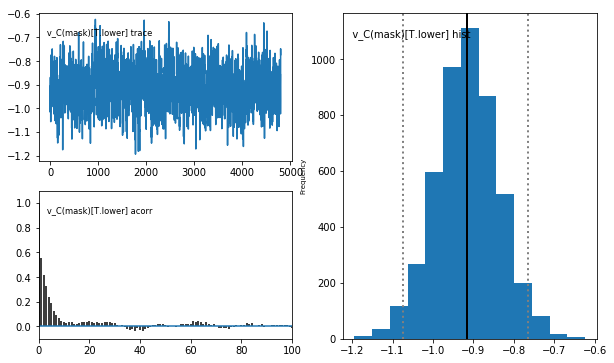

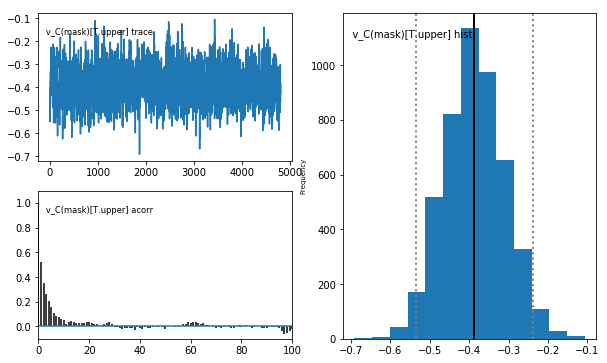

In [17]:
# run model
m_rr2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rr2.print_stats()
m_rr2.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std        2.5q       25q  \
a                                   1.54586  0.0342766     1.47931   1.52338   
a_std                              0.396962  0.0321082    0.337416  0.375489   
a_subj.09coqg8hlpux6fe              1.12379   0.201241    0.791239  0.979473   
a_subj.0b3t2skj9mlhbkn              1.35522   0.210081     1.00163   1.20355   
a_subj.0bcg7mtj2n1jjw9              2.52402   0.387898     1.85258   2.24299   
a_subj.0s53r30oouek89b              1.87528   0.295007     1.37266   1.66532   
a_subj.0uj9gbhag3o1w1v              1.30655   0.266012    0.868224   1.11465   
a_subj.17nzn4k8r1qkmrn              1.67027   0.244104     1.24895    1.4987   
a_subj.1fdkw2qjx3hc3lk              1.35327   0.225511    0.976916   1.19047   
a_subj.1mla0dmotqefnav              1.70543   0.334171     1.15555   1.46566   
a_subj.23hr9tl84h3zhw3              1.63618   0.314618     1.12023   1.40905   
a_subj.27muqwvalwne26r              1.82

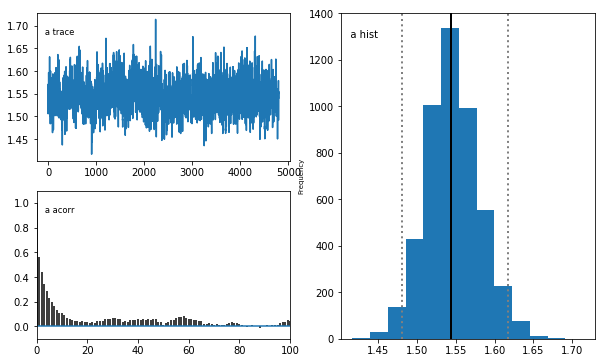

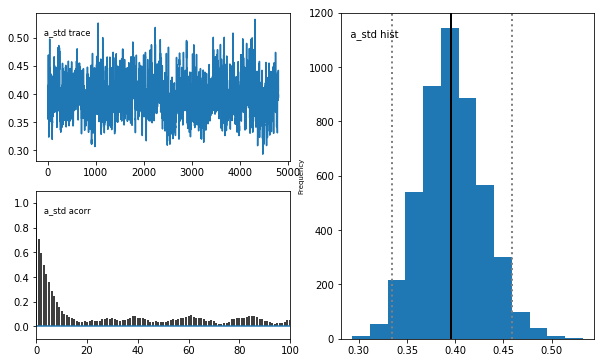

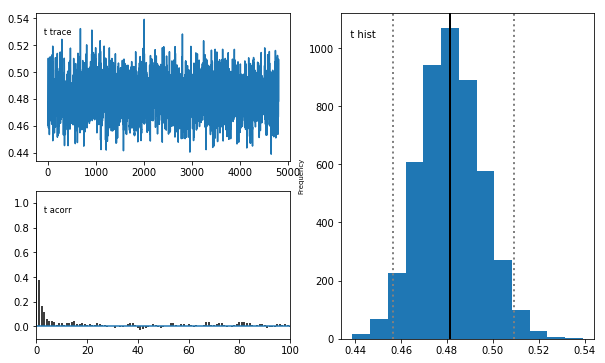

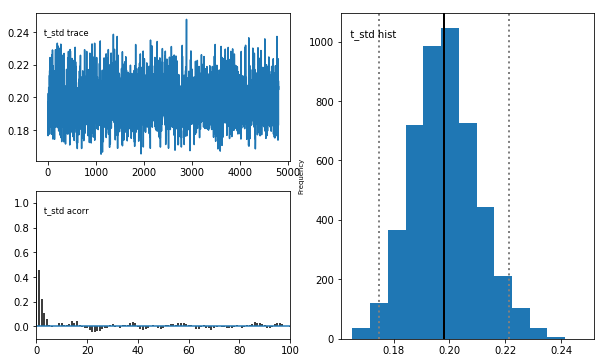

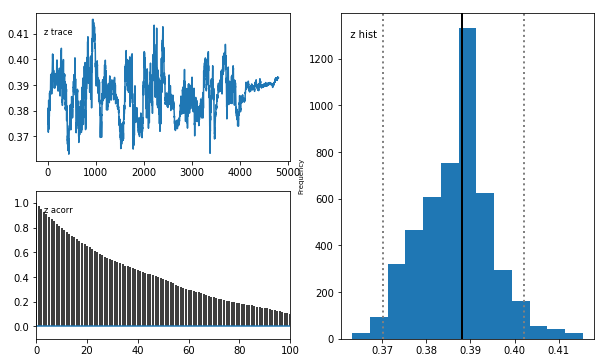

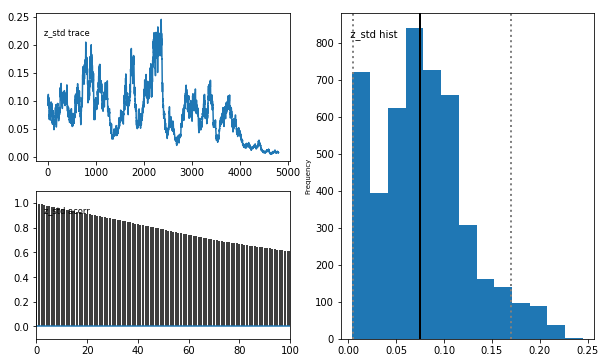

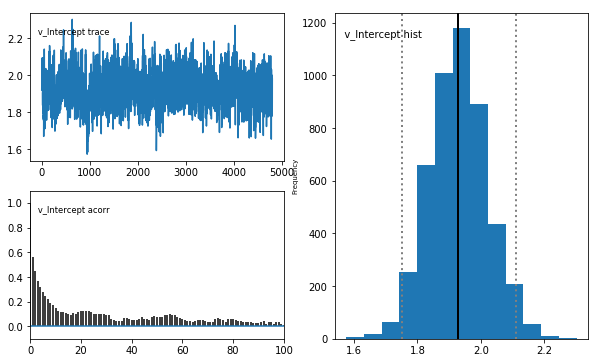

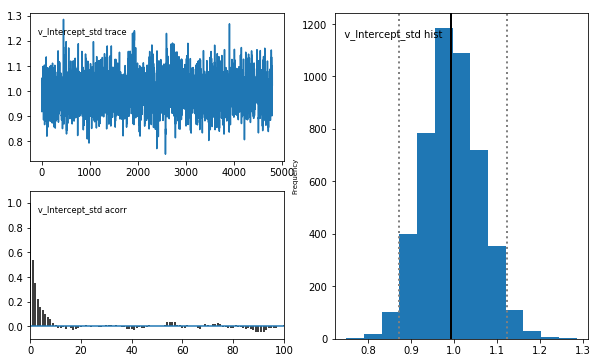

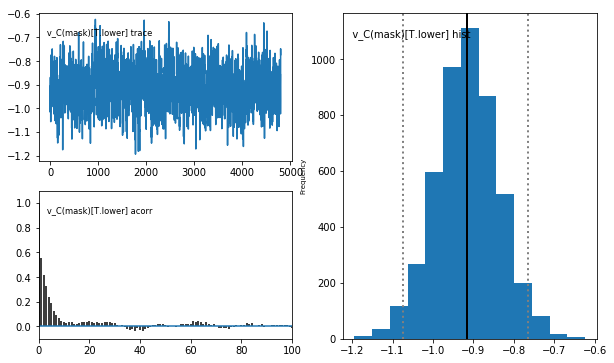

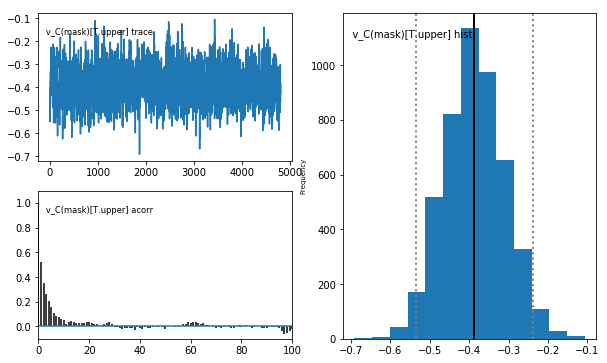

In [18]:
# save model stats
rr2_stats = m_rr2.gen_stats()
print(rr2_stats)
rr2_stats.to_csv('rr2_5000/faceMask2_hddm_drift_maskFalseNegatives_rr2_5000.csv', index=True)

# save model posterior plots
m_rr2.plot_posteriors(path='rr2_5000/_posteriors', save=True)

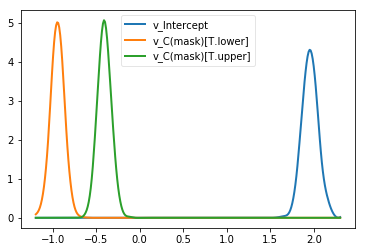

In [19]:
# plot model posteriors by mask
rr2_v_none, rr2_v_lower, rr2_v_upper = m_rr2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rr2_v_none, rr2_v_lower, rr2_v_upper])
plt.savefig('rr2_5000/faceMask2_hddm_drift_maskFalsePositives_rr2_5000_v_mask.pdf')

In [21]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rr2_v_none < 0) = ", (rr2_v_none.trace() < 0).mean())
print("P(rr2_v_lower > 0) = ", (rr2_v_lower.trace() > 0).mean())
print("P(rr2_v_upper > 0) = ", (rr2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rr2_v_lower > rr2_v_upper) = ", (rr2_v_lower.trace() > rr2_v_upper.trace()).mean())

P(rr2_v_none < 0) =  0.0
P(rr2_v_lower > 0) =  0.0
P(rr2_v_upper > 0) =  0.0
P(rr2_v_lower > rr2_v_upper) =  0.0


In [22]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rr1_v_none > rr2_v_none) = ", (rr1_v_none.trace() > rr2_v_none.trace()).mean())
print("P(rr1_v_lower < rr2_v_lower) = ", (rr1_v_lower.trace() < rr2_v_lower.trace()).mean())
print("P(rr1_v_upper > rr2_v_upper) = ", (rr1_v_upper.trace() > rr2_v_upper.trace()).mean())


P(rr1_v_none > rr2_v_none) =  0.00166666666667
P(rr1_v_lower < rr2_v_lower) =  0.001875
P(rr1_v_upper > rr2_v_upper) =  0.117708333333


In [23]:
## adding together the relative values:
rr1_v_none_plus_lower = rr1_v_none.trace() + rr1_v_lower.trace()
rr1_v_none_plus_upper = rr1_v_none.trace() + rr1_v_upper.trace()

rr2_v_none_plus_lower = rr2_v_none.trace() + rr2_v_lower.trace()
rr2_v_none_plus_upper = rr2_v_none.trace() + rr2_v_upper.trace()

In [25]:
print("P(rr1_v_none_plus_lower > rr2_v_none_plus_lower) = ", (rr1_v_none_plus_lower > rr2_v_none_plus_lower).mean())
print("P(rr1_v_none_plus_upper > rr2_v_none_plus_upper) = ", (rr1_v_none_plus_upper > rr2_v_none_plus_upper).mean())

P(rr1_v_none_plus_lower > rr2_v_none_plus_lower) =  0.238958333333
P(rr1_v_none_plus_upper > rr2_v_none_plus_upper) =  0.0
